# 1. Import neccesary library

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets, metrics
from sklearn.model_selection import train_test_split, GridSearchCV # for splitting data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score #for confusion matrix, for evaluating results
import time

# 2. Reading & Cleaning data

In [2]:
#read_dataset
data=pd.read_csv('Nhom06_Gender.csv')
print(data.shape)
data.head()

(5001, 8)


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
#Male:0, Female:1

gemder = {'Male':0, 'Female':1}
data['gender'] = data['gender'].map(gemder)
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1


In [4]:
male=0
female=0

for i in data["gender"]:
    if i==0:
        male+=1
    else:
        female+=1

print('Male:',male)
print('Female:',female)

Male: 2500
Female: 2501


In [5]:
data.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB


In [7]:
#Unique values each column

for i in data.columns:
  print(f'The column "{i}" has {len(data[i].value_counts())} unique values.')

The column "long_hair" has 2 unique values.
The column "forehead_width_cm" has 42 unique values.
The column "forehead_height_cm" has 21 unique values.
The column "nose_wide" has 2 unique values.
The column "nose_long" has 2 unique values.
The column "lips_thin" has 2 unique values.
The column "distance_nose_to_lip_long" has 2 unique values.
The column "gender" has 2 unique values.


# 3. Split data

In [8]:
x=data.drop(columns="gender")
y=data["gender"]
print(y)

0       0
1       1
2       0
3       0
4       1
       ..
4996    1
4997    1
4998    1
4999    1
5000    0
Name: gender, Length: 5001, dtype: int64


In [9]:
print(x)

      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0             1               11.8                 6.1          1          0   
1             0               14.0                 5.4          0          0   
2             0               11.8                 6.3          1          1   
3             0               14.4                 6.1          0          1   
4             1               13.5                 5.9          0          0   
...         ...                ...                 ...        ...        ...   
4996          1               13.6                 5.1          0          0   
4997          1               11.9                 5.4          0          0   
4998          1               12.9                 5.7          0          0   
4999          1               13.2                 6.2          0          0   
5000          1               15.4                 5.4          1          1   

      lips_thin  distance_nose_to_lip_l

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print('Training size:', X_train.shape[0], ', test size:', X_test.shape[0])

Training size: 3500 , test size: 1501


In [11]:
male=0
female=0

for i in Y_train:
    if i==0:
        male+=1
    else:
        female+=1

print('Male:',male)
print('Female:',female)

Male: 1763
Female: 1737


# 4. KNN Model

In [12]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [13]:
Y_pred = knn.predict(X_test)
Y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

# 4.1 Model Evaluation 1NN

[[711  26]
 [ 16 748]]


<AxesSubplot:>

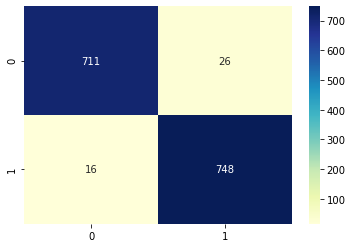

In [14]:
#Confusion matrix 1NN

cm = confusion_matrix(Y_test, Y_pred)
print(cm)
sns.heatmap(cm,annot = True, fmt = ".0f", cmap="YlGnBu")

In [15]:
#Classification report 1NN
 
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       737
           1       0.97      0.98      0.97       764

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [16]:
#Accuracy

print("Accuracy of 1NN:",100*accuracy_score(Y_test, Y_pred),'%')

Accuracy of 1NN: 97.2018654230513 %


# 4.2 KNN Model

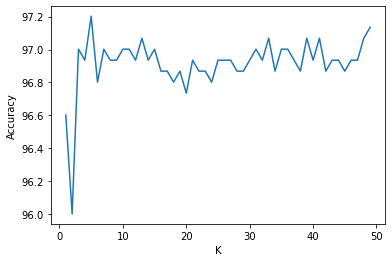

In [17]:
A = []
for k in range(1,50):
    knn= KNeighborsClassifier(n_neighbors=k, p=2)
    knn.fit(X_train, Y_train)
    A.append(100*knn.score(X_test, Y_test))

plt.plot(range(1,50), A)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

# TRAINING WITH K=37, WEIGHTS = DISTANCE

In [18]:
start_time = time.time()
knn= KNeighborsClassifier(n_neighbors=37,p=2, weights = 'distance')
knn.fit(X_train, Y_train)

Y_pred26d = knn.predict(X_test)
end_time = time.time()

print ("Accuracy of 25NN (WEIGHTS = DISTANCE): %.2f %%" %(100*accuracy_score(Y_test, Y_pred26d)))
print("Running time: %.2f (s)" % (end_time - start_time))

Accuracy of 25NN (WEIGHTS = DISTANCE): 97.00 %
Running time: 0.14 (s)


# TRAINING WITH K=26, WEIGHTS = CUSTOMIZED WEIGHTS

In [19]:
start_time = time.time()
def myweight(distances):
    sigma2 = .4
    return np.exp(-distances**2/sigma2)

knn= KNeighborsClassifier(n_neighbors=37,p=2, weights = myweight)
knn.fit(X_train, Y_train)

Y_pred26cw = knn.predict(X_test)
end_time = time.time()

print ("Accuracy of 25NN (WEIGHTS = CUSTOMIZED): %.2f %%" %(100*accuracy_score(Y_test, Y_pred26cw)))
print("Running time: %.2f (s)" % (end_time - start_time))

Accuracy of 25NN (WEIGHTS = CUSTOMIZED): 97.07 %
Running time: 0.10 (s)


# TRAINING WITH K=26

In [20]:
start_time = time.time()
knn= KNeighborsClassifier(n_neighbors=3,p=2)
knn.fit(X_train, Y_train)

Y_pred26 = knn.predict(X_test)
end_time = time.time()

print ("Accuracy of 25NN: %.2f %%" %(100*accuracy_score(Y_test, Y_pred26)))
print("Running time: %.2f (s)" % (end_time - start_time))

Accuracy of 25NN: 97.00 %
Running time: 0.12 (s)


In [21]:
print ("Predicted labels: ", Y_pred[0:20].tolist())
print ("Predicted labels: ", Y_pred26[0:20].tolist())

Predicted labels:  [1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
Predicted labels:  [1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]


# CONFUSION MATRIX

[[705  32]
 [ 13 751]]


<AxesSubplot:>

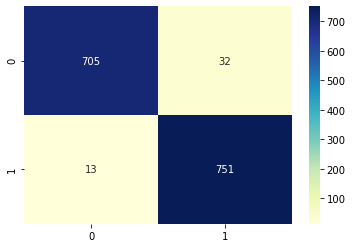

In [22]:
cm = confusion_matrix(Y_test, Y_pred26d)
print(cm)
sns.heatmap(cm,annot = True, fmt = ".0f", cmap="YlGnBu")

In [23]:
print(classification_report(Y_test, Y_pred26d))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       737
           1       0.96      0.98      0.97       764

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501

